<a href="https://colab.research.google.com/github/DonghaeSuh/NLP_Pytorch/blob/main/EDA/aclImdb_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 다운로드 및 압축 해제 ( tarfile 동작 안함 )

In [17]:
ls

aclImdb/  aclImdb_v1/  aclImdb_v1.tar.gz


In [ ]:
cd drive/MyDrive/Pytorch\ NLP/data_in

[Errno 2] No such file or directory: 'drive/MyDrive/Pytorch NLP/data_in'
/content/drive/MyDrive/Pytorch NLP/data_in


In [ ]:
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2023-04-09 11:01:26--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz.1’

aclImdb_v1.tar.gz.1 100%[===================>]  80.23M  23.5MB/s    in 5.6s    

2023-04-09 11:01:32 (14.3 MB/s) - ‘aclImdb_v1.tar.gz.1’ saved [84125825/84125825]



In [ ]:
ls

aclImdb_v1/  aclImdb_v1.tar.gz


In [15]:
''' 
## 작동을 안함;; -> 뭐가 문제인지 모르겠음
import tarfile

tar = tarfile.open("aclImdb_v1.tar.gz")
tar.extractall()
tar.close()
'''

KeyboardInterrupt: ignored

# 데이터 불러오기 및 train_df, test_df 마련

In [20]:
import os
import re
import pandas as pd

In [19]:
import tensorflow as tf
from tensorflow.keras import utils

data_set = tf.keras.utils.get_file(
      fname="imdb.tar.gz", 
      origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
      extract=True)

84125825/84125825 [==============================] - 8s 0us/step


In [24]:
def directory_data(directory):
  data={}
  data["review"]=[]
  
  for file_path in os.listdir(directory):
    with open(os.path.join(directory,file_path),'r') as file:
      data["review"].append(file.read())

  return pd.DataFrame(data)

In [22]:
def data(directory):
  pos_df=directory_data(os.path.join(directory,"pos"))
  neg_df=directory_data(os.path.join(directory,"neg"))
  pos_df["sentiment"]=1
  neg_df["sentiment"]=0

  return pd.concat([pos_df,neg_df])

In [25]:
train_df=data(os.path.join(os.path.dirname(data_set),"aclImdb","train"))
test_df=data(os.path.join(os.path.dirname(data_set),"aclImdb","test"))

In [29]:
print(len(train_df),len(test_df))

25000 25000


# 토크나이징 기준 선정 및 분할

In [35]:
review=list(train_df["review"])

In [38]:
tokenized_by_space=[sent.split() for sent in review]
len_by_space_tokenizing=[len(sent) for sent in tokenized_by_space]
len_by_sentence=[len(sent.replace(' ','')) for sent in review]

# 히스토그램

Text(0, 0.5, 'Number of Reviews')

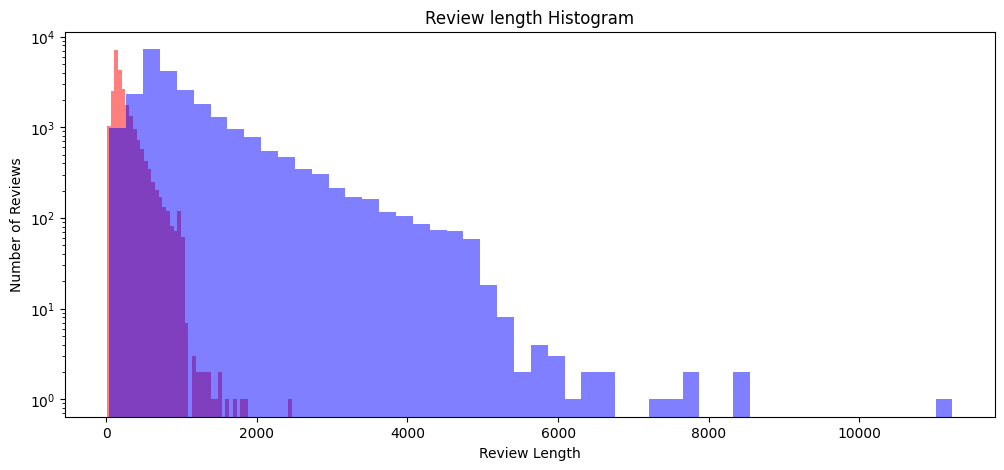

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.hist(len_by_space_tokenizing,bins=50,alpha=0.5,color='r',label='word')
plt.hist(len_by_sentence,bins=50,alpha=0.5,color='b',label='alphabet')

plt.yscale('log',nonpositive='clip')

plt.title("Review length Histogram")
plt.xlabel("Review Length")
plt.ylabel("Number of Reviews")